In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp1a79f800GP2
Verbose mode active!


In [4]:
C = gp2.KUC_UNet2D(workingdir=R.workingdir)

*** GP2  KUC UNet2D ***
Working directory: /tmp/tmp1a79f800GP2


In [5]:
R.classifier = C

In [6]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [7]:
images.shape

(10000, 512, 512, 1)

In [8]:
masks.shape

(10000, 512, 512, 1)

In [9]:
R.run(images=images, masks=masks, runs=1, batch_size=16)

Weights OK!
******
Loop 1
****** TRAINING CLASSIFIER ******
Epoch 1/100
32/32 [==============================] - 34s 725ms/step - loss: 0.2699 - dice_coeff: 0.4864 - val_loss: 0.1224 - val_dice_coeff: 0.8231
Epoch 2/100
32/32 [==============================] - 15s 482ms/step - loss: 0.0841 - dice_coeff: 0.8143 - val_loss: 0.0569 - val_dice_coeff: 0.8748
Epoch 3/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0686 - dice_coeff: 0.8455 - val_loss: 0.0632 - val_dice_coeff: 0.9041
Epoch 4/100
32/32 [==============================] - 15s 479ms/step - loss: 0.0477 - dice_coeff: 0.8915 - val_loss: 0.1380 - val_dice_coeff: 0.6679
Epoch 5/100
32/32 [==============================] - 15s 481ms/step - loss: 0.1045 - dice_coeff: 0.7692 - val_loss: 0.0660 - val_dice_coeff: 0.8119
Epoch 6/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0709 - dice_coeff: 0.8314 - val_loss: 0.0562 - val_dice_coeff: 0.8858
Model saved to: /tmp/tmp1a79f800GP2/kuc_unet2d_0kuc_

In [10]:
R.classifier_scores

[[0.055349793285131454, 0.8866742849349976]]

In [11]:
R.discriminator_scores

[[0.3430158495903015, 0.8733333349227905]]

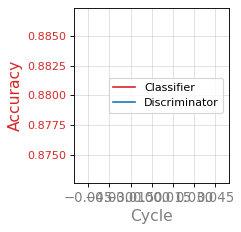

In [12]:
R.plot()

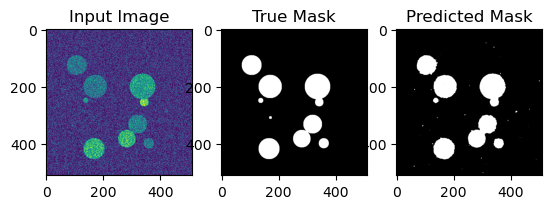

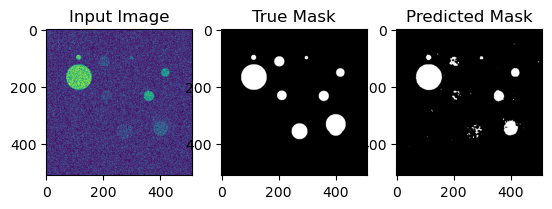

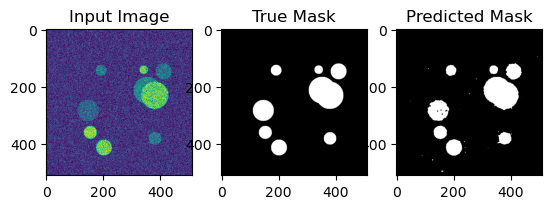

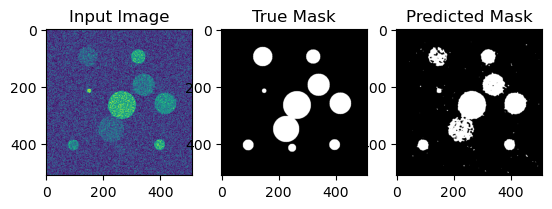

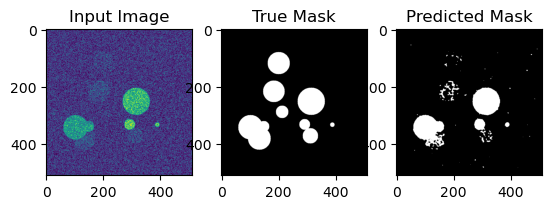

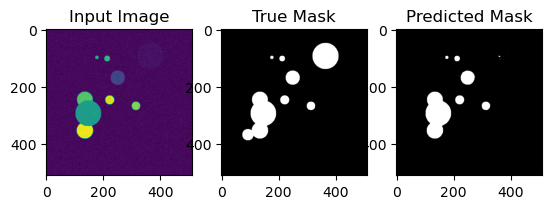

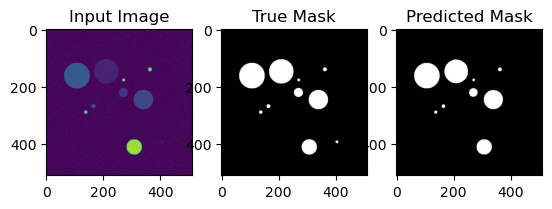

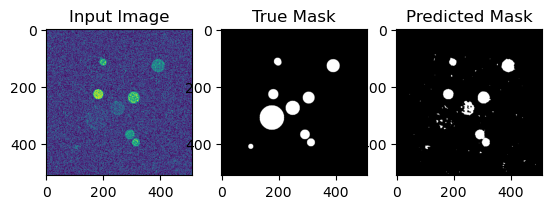

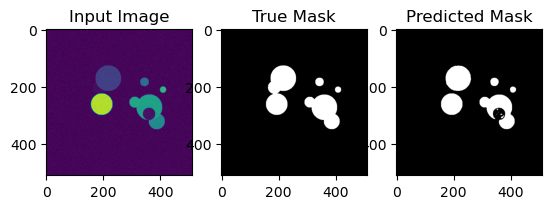

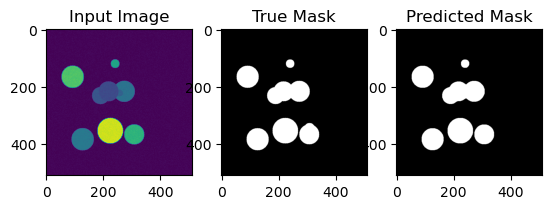

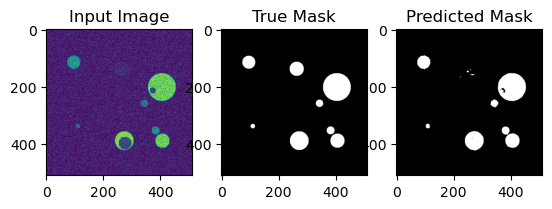

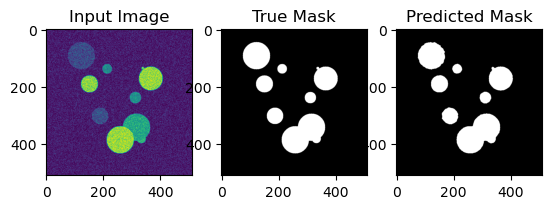

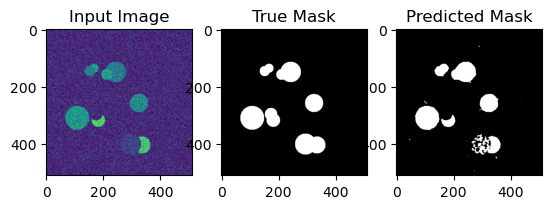

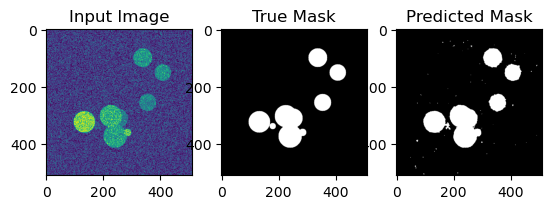

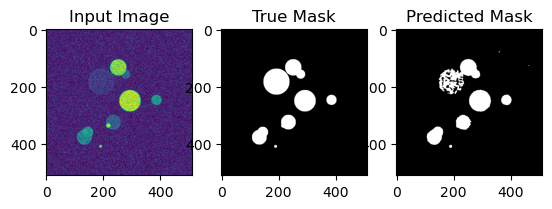

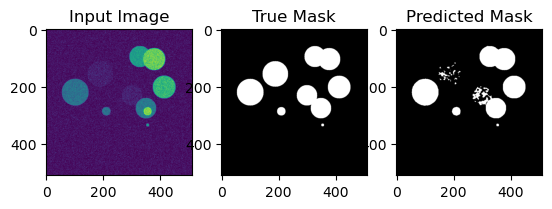

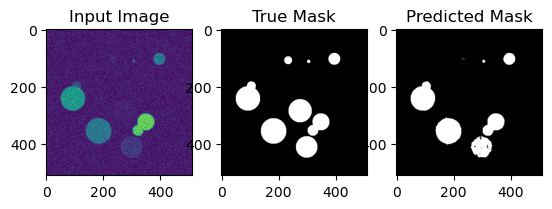

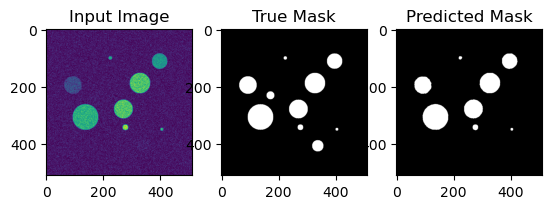

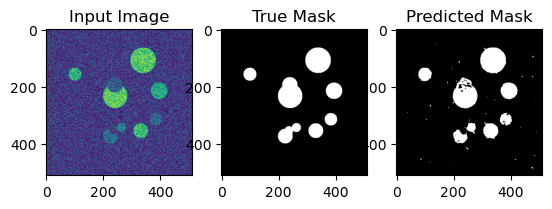

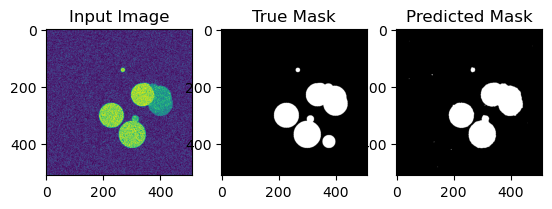

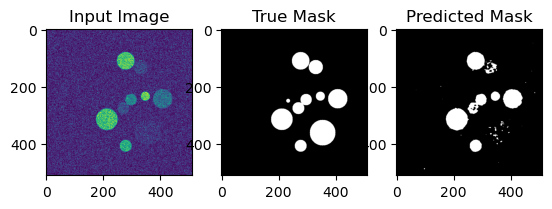

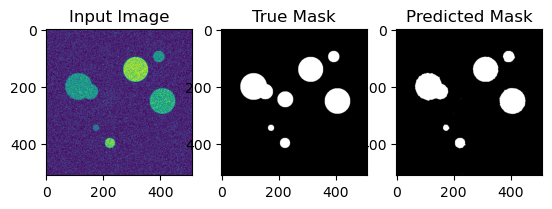

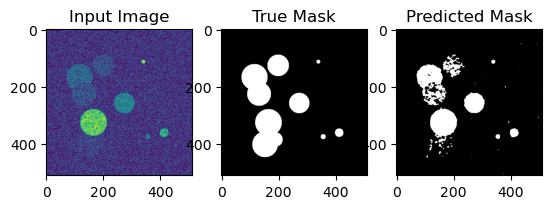

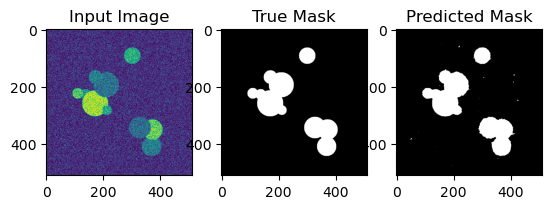

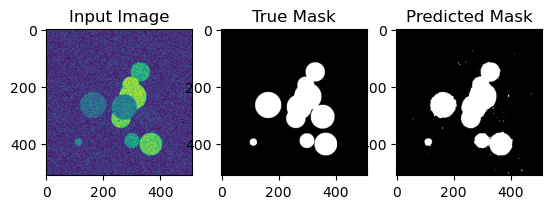

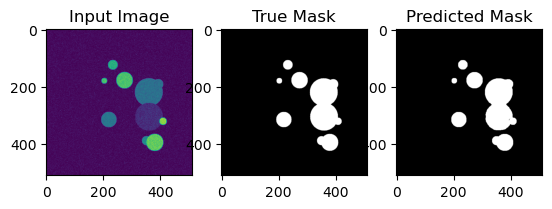

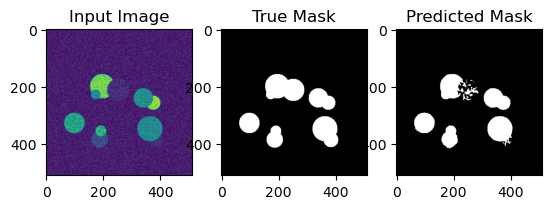

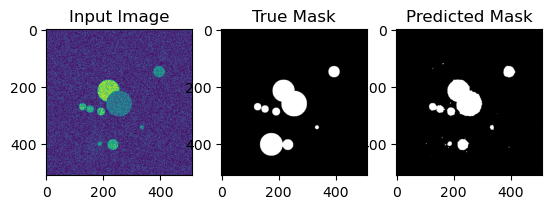

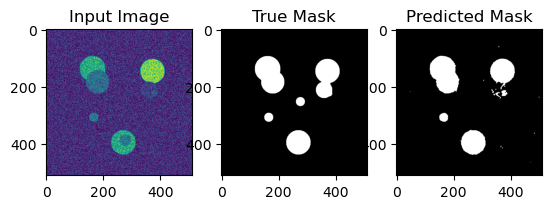

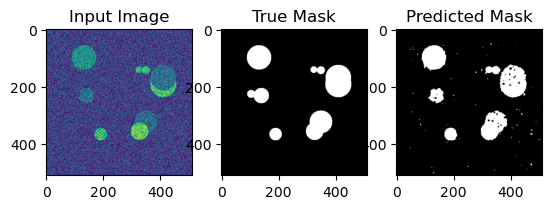

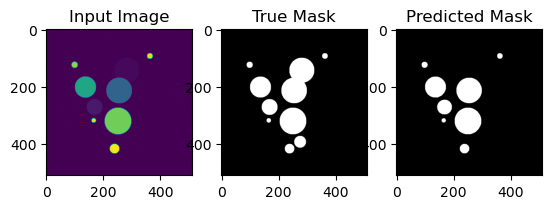

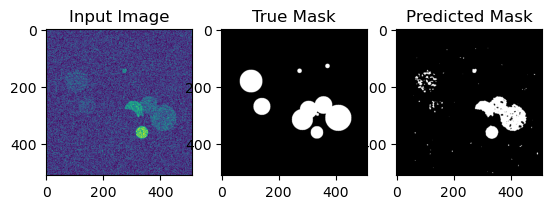

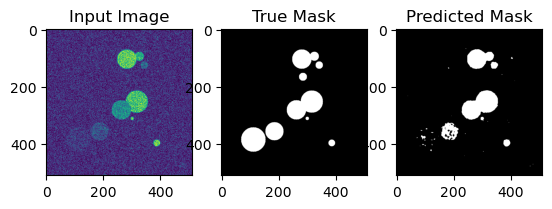

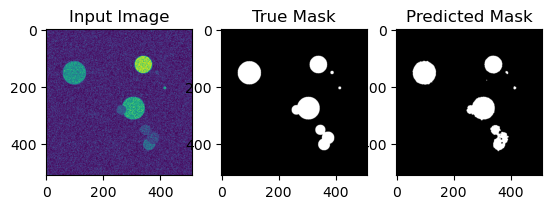

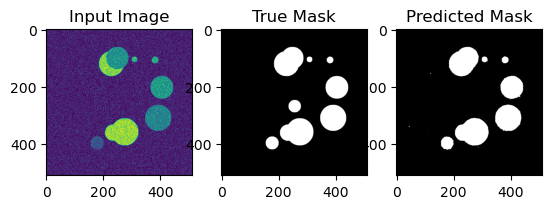

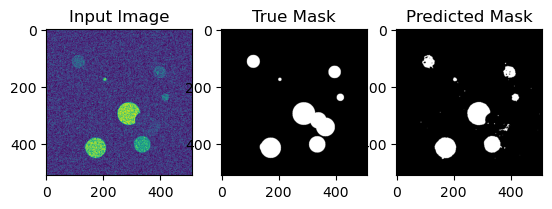

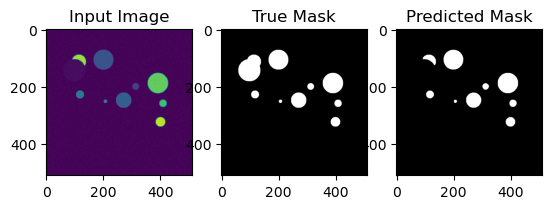

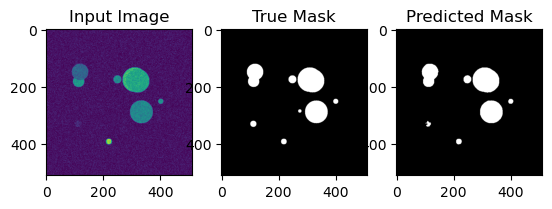

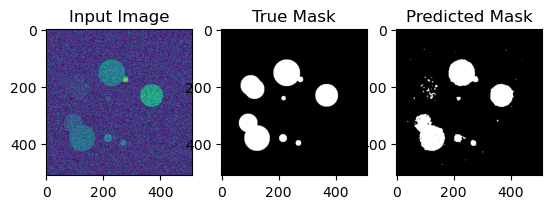

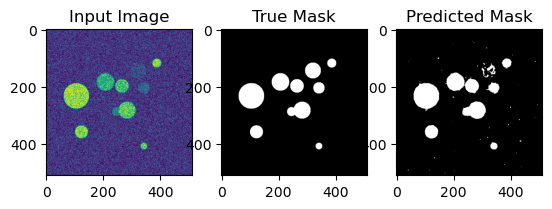

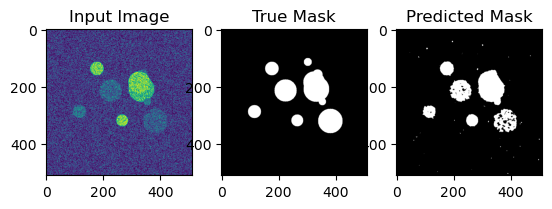

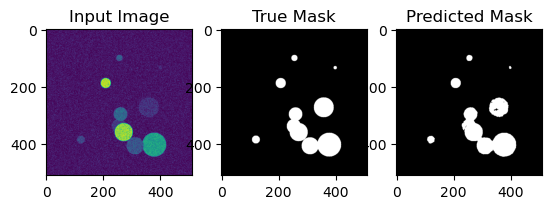

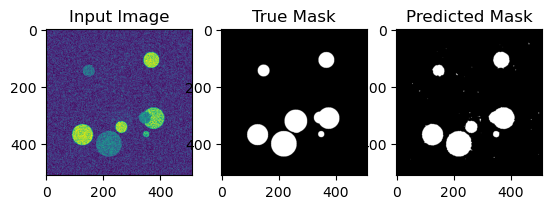

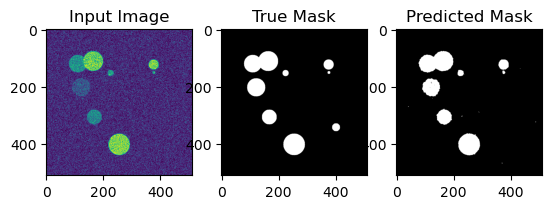

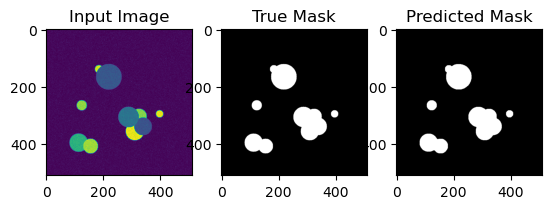

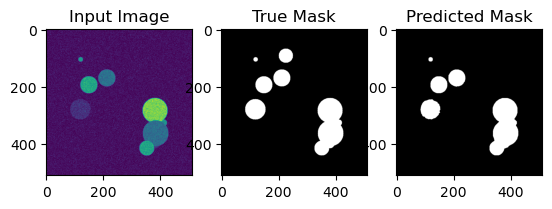

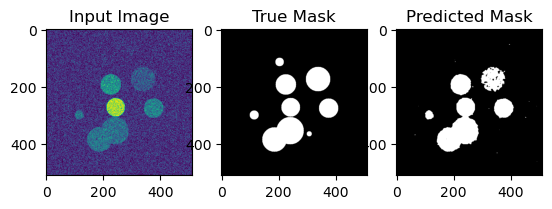

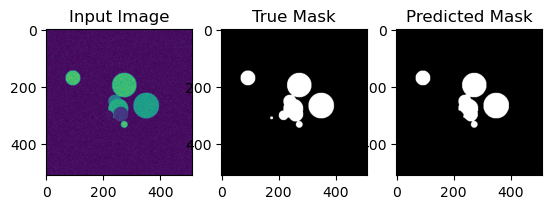

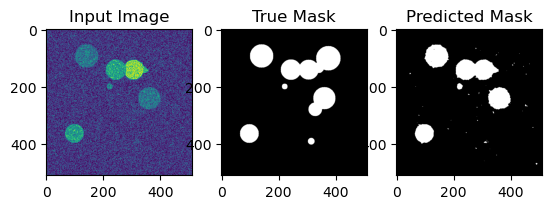

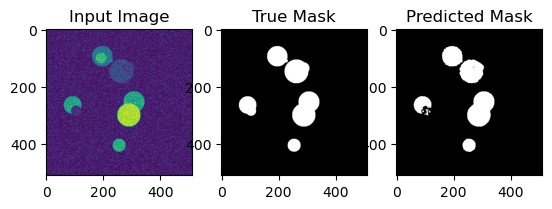

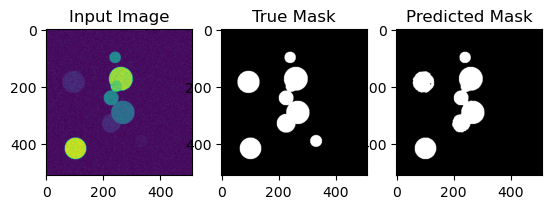

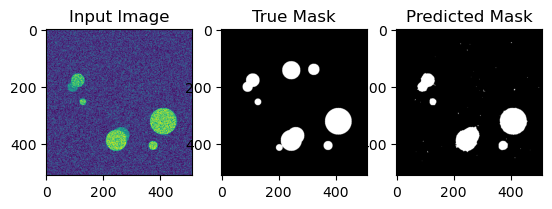

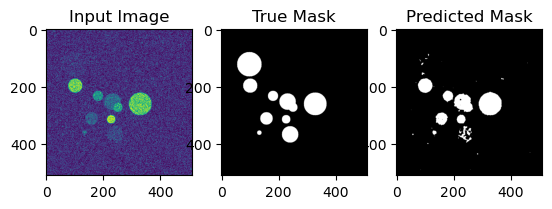

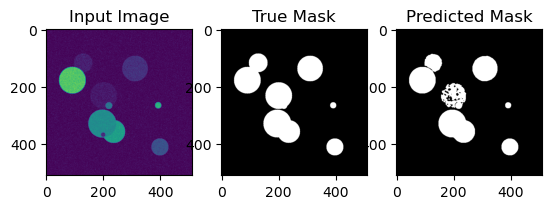

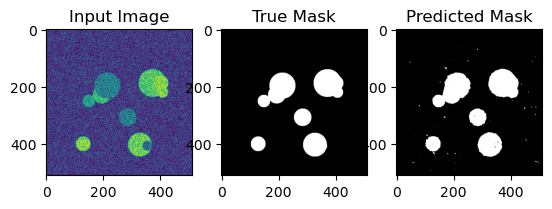

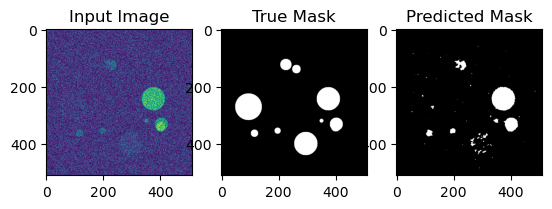

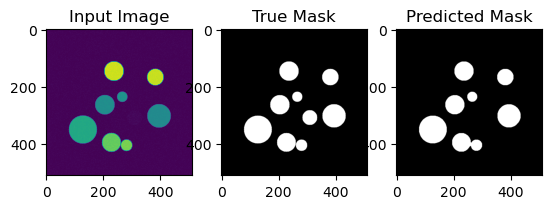

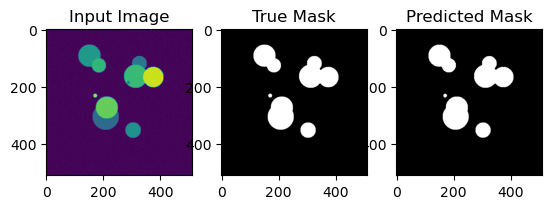

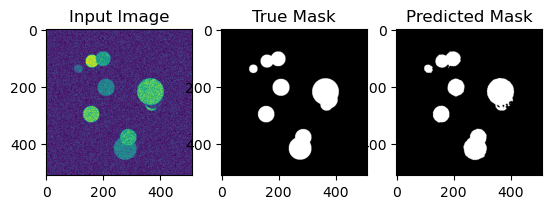

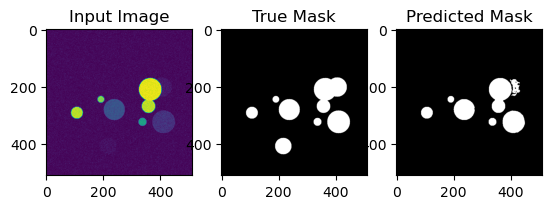

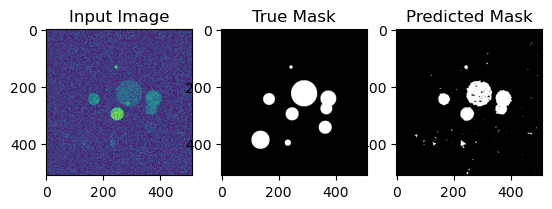

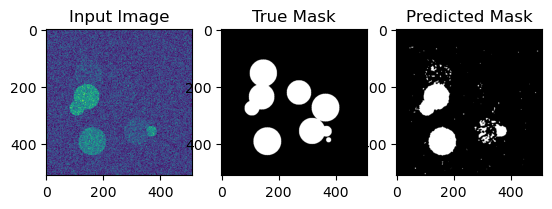

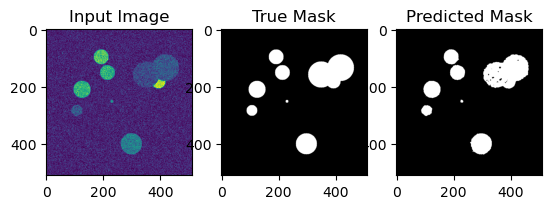

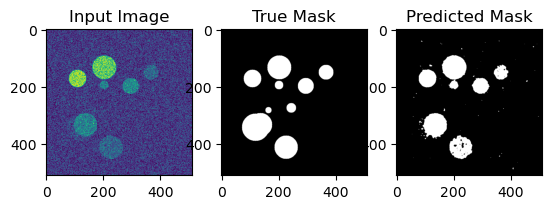

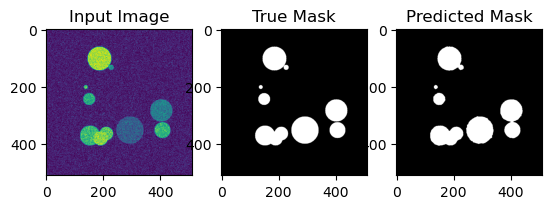

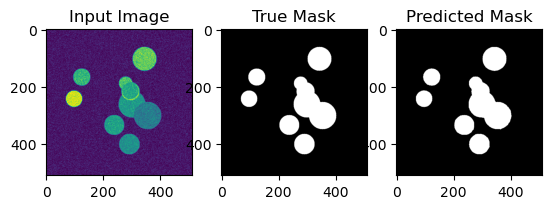

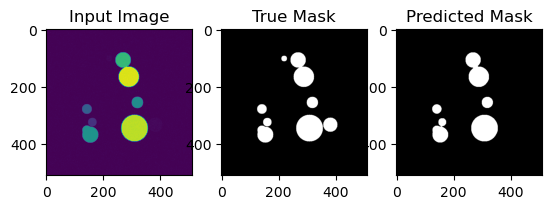

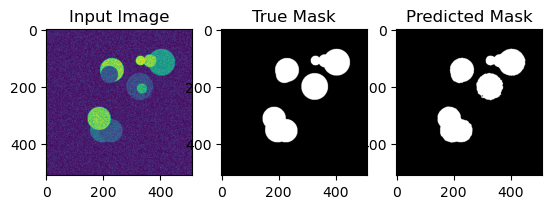

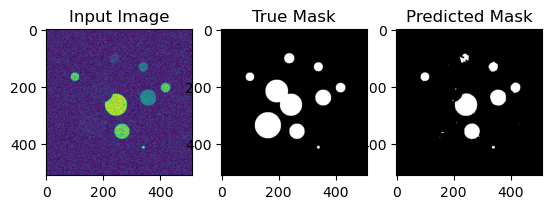

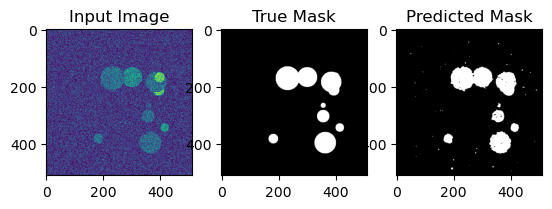

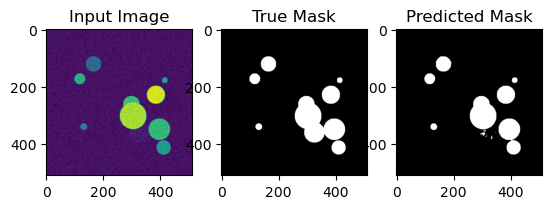

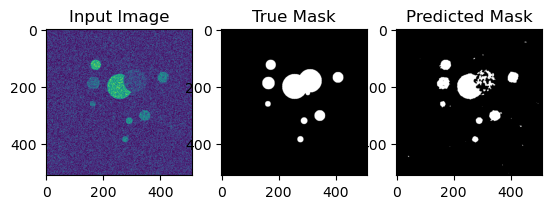

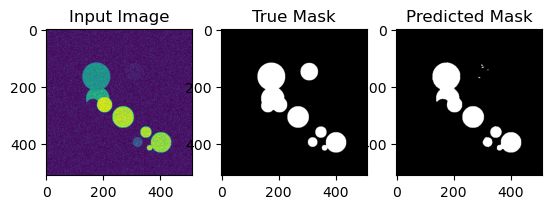

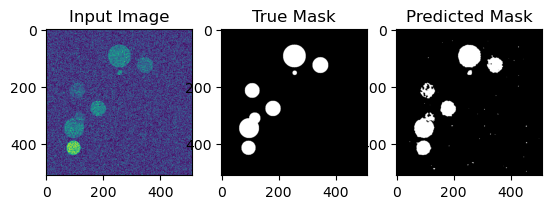

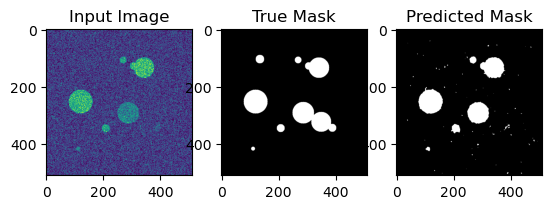

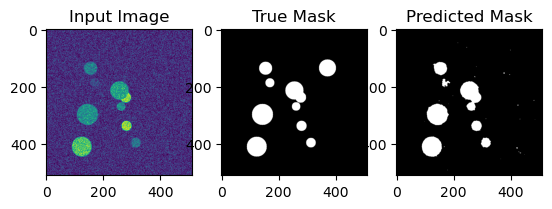

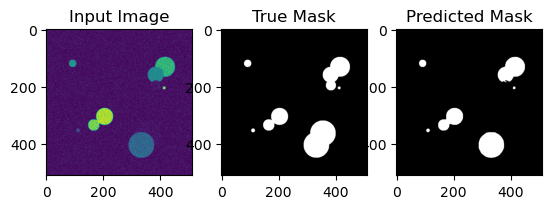

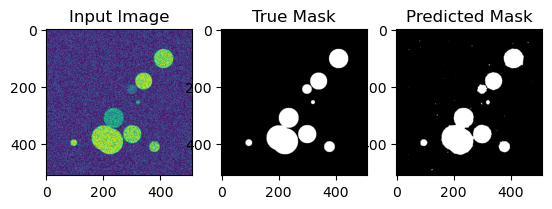

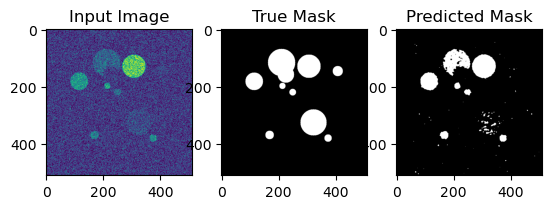

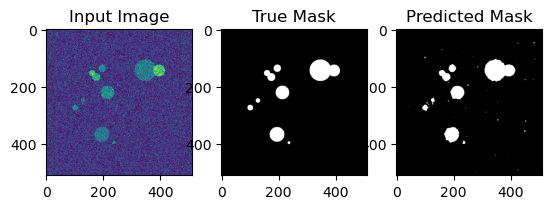

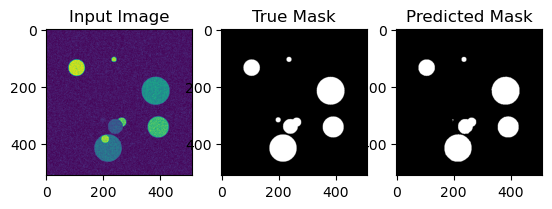

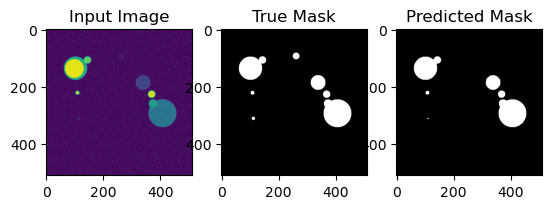

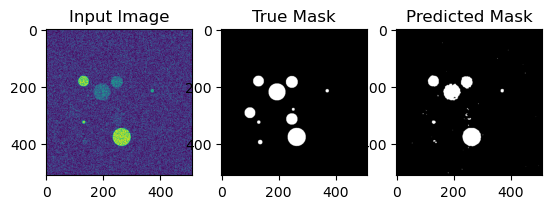

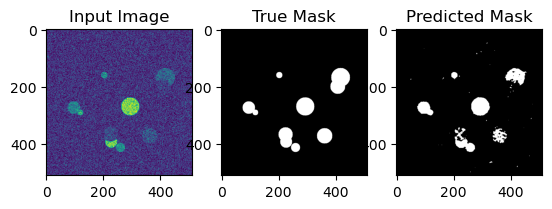

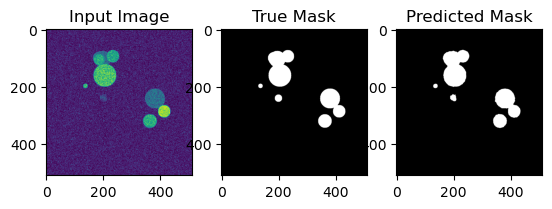

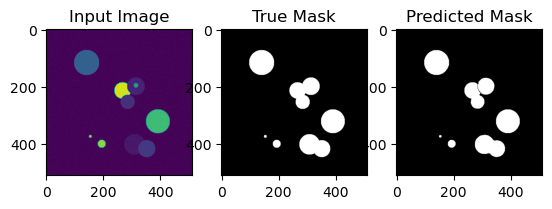

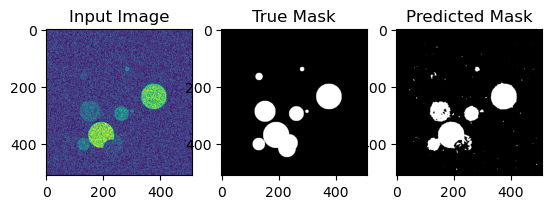

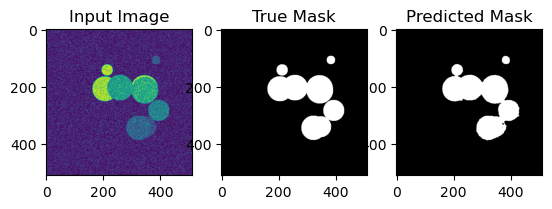

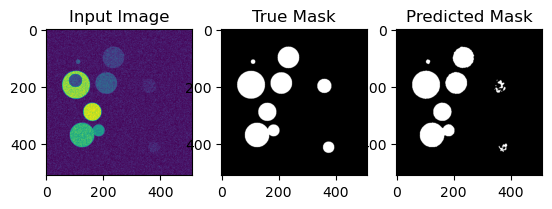

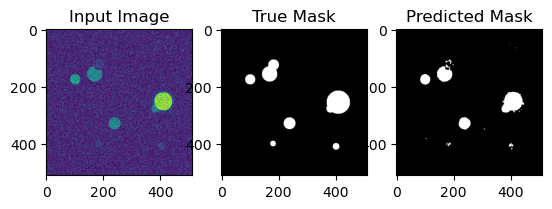

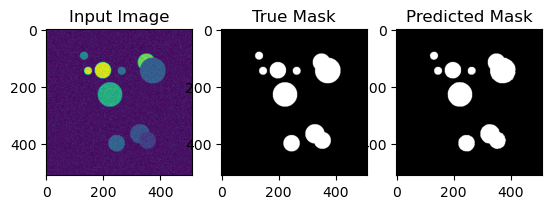

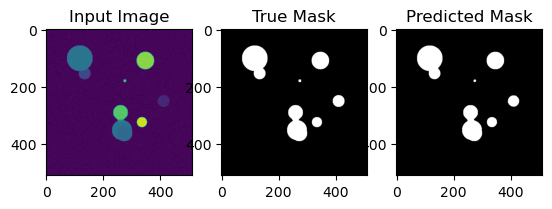

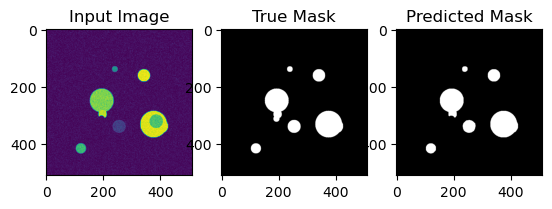

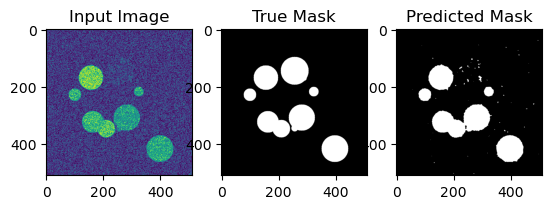

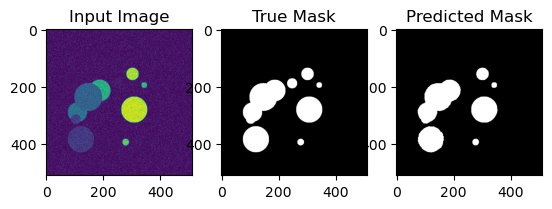

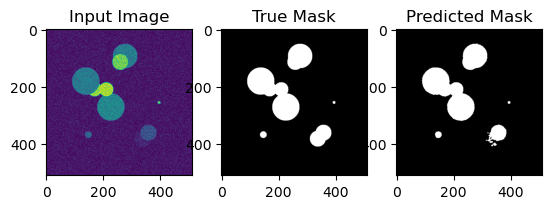

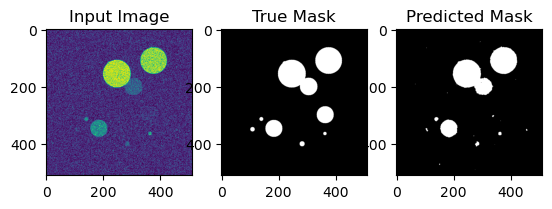

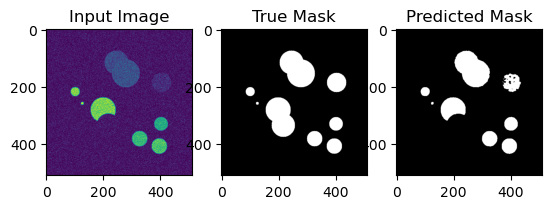

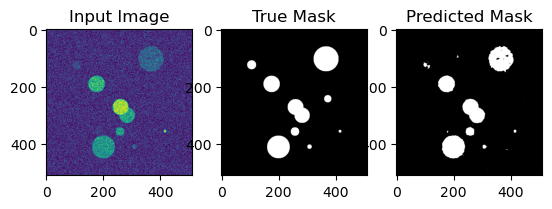

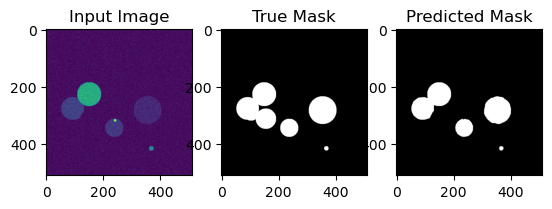

In [13]:
gp2.Util.visualize_predictions(C, images, masks)